### MNIST Machine Learning Model
Implements an MNIST model using PyTorch, NumPy, and MatplotLib. The model uses backpropogation with different layers to achieve 98% accuracy. This work was completed in a team of thr

In [4]:
!pip install torch



### Import Libraries

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image  # Import the PIL library

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# device = 'cuda' if torch.cuda.is_available() else 'cpu' # Sett the 'device' to GPU if a GPU is detected, otherwise set to CPU
# print('Using {} device'.format(device))

### Download training and testing data

In [6]:
#The line below gets the dataset and downloads it into the specified path
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
trainset = torchvision.datasets.MNIST('DOWNLOAD_PATH', download=True, train=True, transform=transform)
testset = torchvision.datasets.MNIST('DOWNLOAD_PATH', download=True, train=False, transform=transform)

train_subset, val_subset = torch.utils.data.random_split(trainset, [50000, 10000], generator=torch.Generator().manual_seed(1))


#This is a convenient module for training, it automatically prepares your data for training with a given batch size.
#The shuffle argument will automatically randomize the order of your data (but will keep inputs with associated outputs!)
trainloader = torch.utils.data.DataLoader(train_subset, batch_size = 64, shuffle = True)
validationloader = torch.utils.data.DataLoader(val_subset, batch_size = 64, shuffle = True)
testloader = torch.utils.data.DataLoader(testset, batch_size = 64, shuffle = True)



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 4471094.56it/s]


Extracting DOWNLOAD_PATH/MNIST/raw/train-images-idx3-ubyte.gz to DOWNLOAD_PATH/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 130533.03it/s]


Extracting DOWNLOAD_PATH/MNIST/raw/train-labels-idx1-ubyte.gz to DOWNLOAD_PATH/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1078768.23it/s]


Extracting DOWNLOAD_PATH/MNIST/raw/t10k-images-idx3-ubyte.gz to DOWNLOAD_PATH/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 5284474.00it/s]

Extracting DOWNLOAD_PATH/MNIST/raw/t10k-labels-idx1-ubyte.gz to DOWNLOAD_PATH/MNIST/raw



### Create dataloaders and visualize some examples

torch.Size([64, 1, 28, 28])
torch.Size([64])


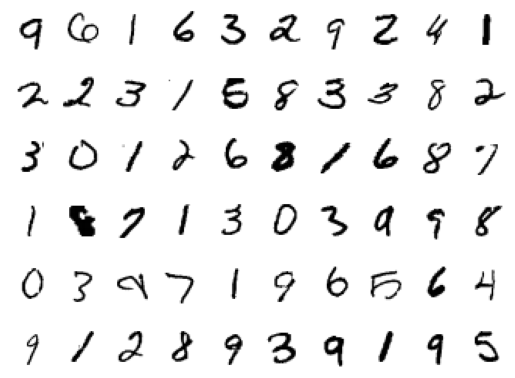

In [7]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

### Model Initialization

In [8]:
#This is the neural network class, extends nn.Module
class Digit_ClassifierX(nn.Module):
  def __init__(self):
    # Handle some under-the-hood PyTorch stuff
    super().__init__()
    # Begin Layers
    self.layer1 = torch.nn.Linear(784,256)
    self.layer2 = torch.nn.Linear(256,128)
    self.layer3 = torch.nn.Linear(128,10)

  def forward(self, x):
    # Forward pass
    x = torch.reshape(x, (-1, 784)).float()
    L1 = nn.functional.relu(self.layer1(x))
    L2 = nn.functional.relu(self.layer2(L1))
    out = self.layer3(L2)
    return out.float()

In [9]:
#Instantiate the model:
model = Digit_ClassifierX()

### Hyperparameters Tuning

In [10]:
# Hyperparameters tuning
num_epochs = 40
learning_rate = 0.03
momentum = 0.9
criterion = nn.CrossEntropyLoss() #consider using these loss functions: https://pytorch.org/docs/stable/nn.html#loss-functions
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum) #consider using these optimizers: https://pytorch.org/docs/stable/optim.html#algorithms

### Model Training

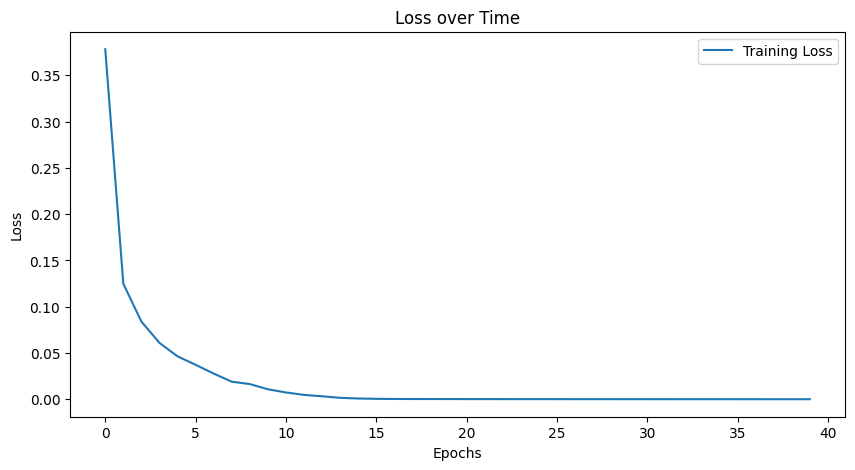

In [11]:
# Keeping track of losses
# device = 'cuda'
running_loss = []
num_epochs_to_print = 100000

#Training loop
model.train()
for i in range(num_epochs):
  epoch_loss = 0
  for images, labels in trainloader:
    #zero out the gradients
    optimizer.zero_grad()

    #Calculate the output
    outputs = model(images)
    #Calculate the loss of the output, note: labels are the ACTUAL image labels, whereas output are your models guesses
    loss = criterion(outputs, labels)
    #Backpropagation (this is the part where we take the gradients [multivariable derivatives] of all the weights)
    loss.backward()
    #This is the part where we actually update the weights
    optimizer.step()

    epoch_loss += loss.item()
# Calculate the average loss for this epoch
  epoch_loss /= len(trainloader)
  running_loss.append(epoch_loss)

    # Print the loss at intervals
    #if (epoch + 1) % num_epochs_to_print == 0:
        #print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}')

# Plotting the loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(running_loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Time')
plt.legend()
plt.show()
    #if i % num_epochs_to_print == 0:
      #print(loss.item())





### Save your model

In [ ]:
#Save your model weights
# Below is my personal drive
# torch.save(model.state_dict(), '/content/gdrive/MyDrive/ENGR96 Machine Learning/weights.pth')

### Evaluate Test Accuracy

In [ ]:
# model.eval()
# correct = 0
# total = 0

# #ensure gradients won't get changed
# with torch.no_grad():
#   for images, labels in testloader:
#     for i in range(len(labels)):
#       #do any preprocessing

#       #calculate the output
#       output = model(images[i])

#       predicted_label = output.index(max(output))

#       if predicted_label == labels[i]:
#         correct += 1
#       total += 1

# print("Test accuracy: ", correct/total)
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test accuracy: {100 * correct / total:.2f}%')

# Function to preprocess a custom image
def preprocess_image(image_path):
    transform = torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),  # Convert to tensor
        torchvision.transforms.Normalize((0.5,), (0.5,))  # Normalize to the same range as training data
    ])
    img = Image.open(image_path).convert('L')  # Ensure image is grayscale
    img = img.resize((28, 28))  # Ensure image is 28x28
    img_tensor = transform(img)
    img_tensor = img_tensor.unsqueeze(0)  # Add batch dimension
    return img_tensor

# Path to your custom image
custom_image_path = '/content/gdrive/MyDrive/ENGR96 Machine Learning/teamMJJ/11.png'
processed_image = preprocess_image(custom_image_path)

# Predict the digit for your custom image
model.eval()
with torch.no_grad():
    output = model(processed_image)
    predicted_digit = torch.argmax(output, dim=1).item()
    print(f'The predicted digit is: {predicted_digit}')

Test accuracy: 98.28%
The predicted digit is: 1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')